<a href="https://colab.research.google.com/github/phani3755/LLM-MODELS/blob/main/Assignment_3_Large_Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.Familiarising yourself with the literature**
- One of the first steps in a research project is familiarising yourself with the literature. This includes, what is the history of the problem, what methods are used to approach this problem.

**Literature Study**

The introduction of BERT (Bidirectional Encoder Representations from Transformers) by Devlin et al. (2018) revolutionized NLP by advancing models' ability to understand and process human language, setting a new benchmark for NLP research and moving beyond traditional methods.

**History of the Problem**

Before BERT, traditional models like RNNs and LSTMs struggled with contextual understanding due to sequential processing and issues like vanishing gradients. The transformer architecture introduced by Vaswani et al. (2017) enabled parallel processing and captured long-range dependencies through self-attention, marking a significant advancement. BERT further improved upon this by utilizing bidirectional context, enhancing the model's holistic language comprehension.

**Evolution of BERT**

BERT, introduced in 2018, utilized the transformer architecture for bidirectional text processing through Masked Language Model (MLM) and Next Sentence Prediction (NSP) objectives. This approach enhanced understanding by considering context from both directions and predicting sentence relationships, leading to state-of-the-art results in various NLP tasks. BERT's versatility and fine-tuning capability made it widely adopted in both academia and industry.

**Impact and Extensions**

BERT‚Äôs success led to extensions like RoBERTa (Liu et al., 2019), which refined pretraining and omitted NSP for better performance; ALBERT (Lan et al., 2019), which reduced model size while retaining accuracy; and DistilBERT (Sanh et al., 2019), which offered a more efficient version of BERT. These models set new benchmarks and broadened the applicability of transformer-based approaches.

**Methods Used to Approach the Problem**

- **Sentiment Analysis using the Sentiment140 Dataset:** The Sentiment140 dataset, with its informal Twitter language and contextual nuances, challenges traditional models. BERT‚Äôs bidirectional context understanding enhances its ability to accurately classify sentiment (Go et al., 2009).

- **Masked Language Modeling using the IMDb Dataset:** The IMDb dataset‚Äôs varied and emotionally rich reviews are perfect for fine-tuning BERT (Devlin et al., 2019). The MLM task enables BERT to predict masked words effectively, improving sentiment analysis performance.

- **Text Classification using RoBERTa on the AG News Dataset:** RoBERTa (Liu et al., 2019), an enhanced BERT variant, refines pretraining and omits the NSP task, making it highly effective for large-scale text classification with the AG News dataset.

In summary, BERT‚Äôs evolution from earlier NLP models marks a major advancement in language understanding, overcoming the limitations of unidirectional models with bidirectional training. BERT and its successors, like RoBERTa, ALBERT, and DistilBERT, demonstrate significant versatility and effectiveness across various applications, setting a new standard in NLP.

**References**

- Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of deep bidirectional transformers for language understanding. arXiv preprint arXiv:1810.04805.  [link : https://arxiv.org/abs/1810.04805 ]

- Go, A., Bhayani, R., & Huang, L. (2009). Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford. [ Link : https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf ]

- Lan, Z., Chen, M., Goodman, S., Gimpel, K., Sharma, P., & Soricut, R. (2019). ALBERT: A lite BERT for self-supervised learning of language representations. arXiv preprint arXiv:1909.11942. [Link : https://arxiv.org/abs/1909.11942]

- Liu, Y., Ott, M., Goyal, N., Du, J., Joshi, M., Chen, D., ... & Stoyanov, V. (2019). RoBERTa: A robustly optimized BERT pretraining approach. arXiv preprint arXiv:1907.11692. [Link : https://arxiv.org/abs/1907.11692 ]

- Sanh, V., Debut, L., Chaumond, J., & Wolf, T. (2019). DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. arXiv preprint arXiv:1910.01108. [Link : https://arxiv.org/abs/1910.01108]

- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in Neural Information Processing Systems, 30, 5998-6008. [link : https://arxiv.org/abs/1706.03762]

# Github Link : https://github.com/phani3755/LLM-MODELS

In [ ]:
# Import function to clear cell output
from IPython.display import clear_output
!pip install transformers datasets
clear_output()

In [ ]:
!pip install transformers datasets  # Install the necessary libraries: 'transformers' for NLP models and 'datasets' for loading datasets
clear_output()  # Clear the output to keep the notebook clean after installing the libraries


### **2.Experimenting with BERT transformer models**


-   **Dataset Used** **:** **sentiment140**

**1. Intoduction**

We all love sharing our thoughts online, especially on social media, where our feelings about everything from daily events to global happenings are expressed. However, navigating through countless tweets to gauge public sentiment can be overwhelming. Understanding whether a trending topic is generating positive or negative reactions by manually reading through hundreds of tweets is a daunting and time-consuming task. Fortunately, LLM's, particularly sentiment analysis with models like BERT, simplifies this process. By training a BERT model on the Sentiment140 dataset, we aim to automate sentiment classification of tweets, providing valuable insights into public opinion trends efficiently.

**Import Libraries and Set Up Environment**

In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import re
# Import BERT tokenizer and BERT model for sequence classification
from transformers import BertTokenizer, TFBertForSequenceClassification

pd.set_option('display.max_rows', None)


**2. Methodology**

For sentiment analysis, I utilized the BERT model, specifically for sequence classification tasks. The Sentiment140 dataset, comprising tweets labeled as positive or negative, was loaded from Hugging Face datasets library. A pre-trained BERT model, saved locally, was loaded along with the bert-base-uncased tokenizer. The input text is tokenized, and the model's logits are converted to probabilities using a softmax function. A user interface was created to facilitate real-time predictions, where input text is classified as either "Positive" or "Negative" based on the model‚Äôs output.

**Load and Import Sentiment140 Dataset**

In [ ]:
from datasets import load_dataset
import pandas as pd

# Loading Sentiment140 dataset, which contains tweets labeled with sentiment (positive or negative)
dataset = load_dataset('sentiment140')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for sentiment140 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sentiment140.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/1600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/498 [00:00<?, ? examples/s]

**Convert Dataset to DataFrames and Preprocess Labels**

In [ ]:
# Access the training portion of the dataset
train_data = dataset['train']

# Access the testing portion of the dataset
test_data = dataset['test']


In [ ]:
# Convert the training data into a pandas DataFrame with 'text' and 'label' columns
train_df = pd.DataFrame({
    'text': train_data['text'],  # Column for the text of the tweets
    'label': train_data['sentiment']  # Column for the sentiment labels of the tweets
})

# Convert the testing data into a pandas DataFrame with 'text' and 'label' columns
test_df = pd.DataFrame({
    'text': test_data['text'],  # Column for the text of the tweets
    'label': test_data['sentiment']  # Column for the sentiment labels of the tweets
})


In [ ]:
# Replace the label value of 4 with 1 in the training DataFrame
train_df['label'] = train_df['label'].replace(4, 1)

# Replace the label value of 4 with 1 in the testing DataFrame
test_df['label'] = test_df['label'].replace(4, 1)


In [ ]:
# Display counts of each unique value in the 'label'

train_df['label'].value_counts()


label
0    800000
1    800000
Name: count, dtype: int64

In [ ]:
# Remove rows with label 2 in test DataFrame

test_df = test_df[test_df['label'] != 2]

In [ ]:
# Count unique values in test 'label' column

test_df['label'].value_counts()

label
1    182
0    177
Name: count, dtype: int64

**Balance Training Data by Sampling and Shuffle**

In [ ]:
# Sample 10,000 entries with label 0 from train DataFrame
sampled_0 = train_df[train_df['label'] == 0].sample(n=10000, random_state=42)

# Sample 10,000 entries with label 1 from train DataFrame
sampled_1 = train_df[train_df['label'] == 1].sample(n=10000, random_state=42)


In [ ]:
# Concatenate sampled entries with labels 0 and 1 to create a balanced train sample
train_sample_balanced = pd.concat([sampled_0, sampled_1])


In [ ]:
# Shuffle the balanced train sample and reset the index
train_sample_balanced = train_sample_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
print(train_sample_balanced['label'].value_counts())

label
1    10000
0    10000
Name: count, dtype: int64


**Preprocessing**

In [ ]:
def clean_text(text):
    # lowercase conversion
    text = text.lower()

    # URLs removal
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # mentions (e.g., @username) Removal
    text = re.sub(r'@\w+', '', text)

    # punctuation Removal
    text = re.sub(r'[^\w\s]', '', text)

    # Replace multiple whitespace with a single space and trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
train_df = train_sample_balanced

In [ ]:
# Applying cleaning function to 'text' column in train DataFrame
train_df['text'] = train_df['text'].apply(clean_text)

# Applying cleaning functionto the 'text' column in test DataFrame
test_df['text'] = test_df['text'].apply(clean_text)


**Display Samples of Positive and Negative Tweets**

In [ ]:
from tabulate import tabulate  # Import tabulate for formatted table output

# Filter positive tweets (label 1) from the train DataFrame
positive_tweets = train_df[train_df['label'] == 1]

# Filter negative tweets (label 0) from the train DataFrame
negative_tweets = train_df[train_df['label'] == 0]

# Sample 5 positive tweets
sample_positive = positive_tweets.sample(n=5)

# Sample 5 negative tweets
sample_negative = negative_tweets.sample(n=5)

# Print sample positive tweets in a formatted table
print("Sample Positive Tweets:")
print(tabulate(sample_positive[['text']], headers=['Text'], tablefmt='fancy_grid'))

# Print sample negative tweets in a formatted table
print("\nSample Negative Tweets:")
print(tabulate(sample_negative[['text']], headers=['Text'], tablefmt='fancy_grid'))



Sample Positive Tweets:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ       ‚îÇ Text                                                                                                                ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ   236 ‚îÇ ilove everything old school                                     

**EDA**

In [ ]:
# Create a copy of the train DataFrame for exploratory data analysis (EDA)
eda_df = train_df.copy()

**Sentiment Distribution**

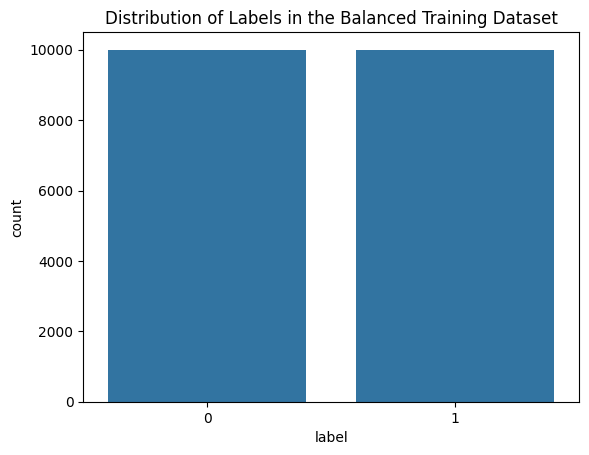

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of the label distribution in the balanced training dataset
sns.countplot(x='label', data=train_sample_balanced)

# title
plt.title('Distribution of Labels in the Balanced Training Dataset')

# Display the plot
plt.show()


**Tweet Length Analysis**

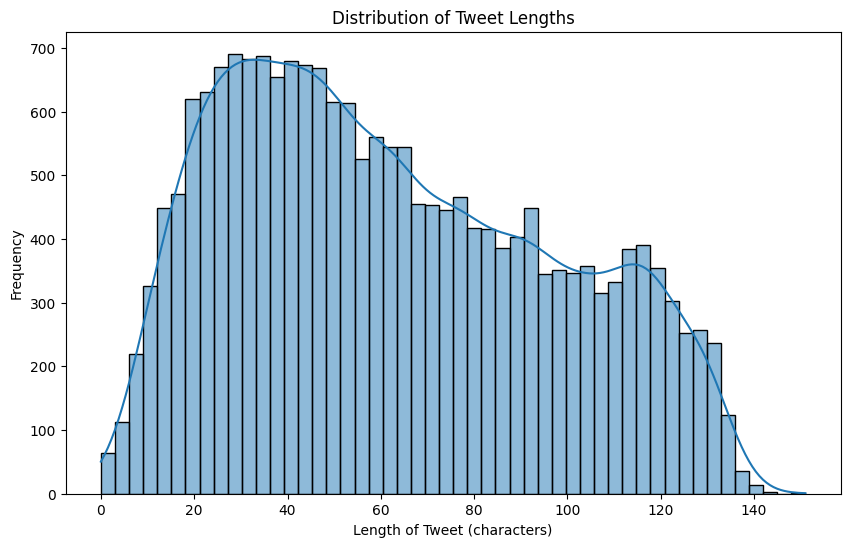

In [ ]:
# Adding tweet length column to eda_df
eda_df['text_length'] = eda_df['text'].apply(len)

plt.figure(figsize=(10, 6))

# histogram with a KDE of tweet lengths
sns.histplot(eda_df['text_length'], bins=50, kde=True)

plt.title('Distribution of Tweet Lengths')

plt.xlabel('Length of Tweet (characters)')


plt.ylabel('Frequency')

plt.show()


**Split Training Data into Training and Validation Sets**

In [ ]:
# Split the train DataFrame into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

# training data size
print(f"Training data size: {len(train_df)}")

# validation data size
print(f"Validation data size: {len(val_df)}")

# test data size
print(f"Test data size: {len(test_df)}")


Training data size: 16000
Validation data size: 4000
Test data size: 359


**Initialize BERT Tokenizer**

In [ ]:
# pre-trained BERT tokenizer Loading
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

**Tokenize and Encode Text Data**

In [ ]:
def tokenize_and_encode(texts, tokenizer, max_length=256):
    # Tokenize, encode the text using tokenizer
    return tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')

# Tokenize and encode the training texts
train_encodings = tokenize_and_encode(train_df['text'].tolist(), tokenizer)

# Tokenize and encode the validation texts
val_encodings = tokenize_and_encode(val_df['text'].tolist(), tokenizer)

# Tokenize and encode the test texts
test_encodings = tokenize_and_encode(test_df['text'].tolist(), tokenizer)


**Create TensorFlow Datasets for Training, Validation, and Testing**

In [ ]:
def create_tf_dataset(encodings, labels, batch_size=32):
    # TensorFlow dataset  Creation
    dataset = tf.data.Dataset.from_tensor_slices((
        dict(encodings),  # Convert encodings to a dictionary
        labels  # Labels for the dataset
    ))
    # Shuffle, batch, and prefetch the dataset for performance optimization
    dataset = dataset.shuffle(len(labels)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create TensorFlow datasets for training, validation, and testing
train_dataset = create_tf_dataset(train_encodings, train_df['label'].values)
val_dataset = create_tf_dataset(val_encodings, val_df['label'].values)
test_dataset = create_tf_dataset(test_encodings, test_df['label'].values)


**3. Training and Fine Tuning**

In this sentiment analysis task, the BERT-based model was trained using a dataset split into training (16,000 samples), validation (4,000 samples), and testing (359 samples) sets. The model was fine-tuned over 3 epochs, with performance metrics evaluated on both validation and test datasets. The training process showed a steady improvement, achieving a validation accuracy of 92.07% by the final epoch. On test dataset, the model achieved an accuracy of 83.01% and the loss of 0.478. This robust performance showcase the effectiveness of the BERT-based approach in classifying sentiments in tweet data.



**Initialize and Compile BERT Model for Sequence Classification**

In [ ]:
# pre-trained BERT model Loading for 2 output labels sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Train BERT Model**

In [ ]:
# Train the model for 3 epochs
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=3)


Epoch 1/3
500/500 [==============================] - 922s 2s/step - loss: 0.4723 - accuracy: 0.7795 - val_loss: 0.4144 - val_accuracy: 0.8115
Epoch 2/3
500/500 [==============================] - 872s 2s/step - loss: 0.3334 - accuracy: 0.8576 - val_loss: 0.4331 - val_accuracy: 0.8092
Epoch 3/3
500/500 [==============================] - 882s 2s/step - loss: 0.2075 - accuracy: 0.9207 - val_loss: 0.5125 - val_accuracy: 0.8087


In [ ]:
# Evaluating the model on test dataset
eval_results = model.evaluate(test_dataset)

# loss on test
print(f"Test Loss: {eval_results[0]}")

# Accuracy on test
print(f"Test Accuracy: {eval_results[1]}")

12/12 [==============================] - 7s 535ms/step - loss: 0.4778 - accuracy: 0.8301
Test Loss: 0.47778668999671936
Test Accuracy: 0.8300835490226746


**Saving BERT Model and Tokenizer**

In [ ]:
# Saving trained model to a specified directory
model.save_pretrained('/content/drive/MyDrive/Projects/Assignments/Bert_model')

# Saving tokenizer to a specified directory
tokenizer.save_pretrained('/content/drive/MyDrive/Projects/Assignments/tokenizer')


('/content/drive/MyDrive/Projects/Assignments/tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/Projects/Assignments/tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/Projects/Assignments/tokenizer/vocab.txt',
 '/content/drive/MyDrive/Projects/Assignments/tokenizer/added_tokens.json')

**Plot Training and Validation Accuracy and Loss**

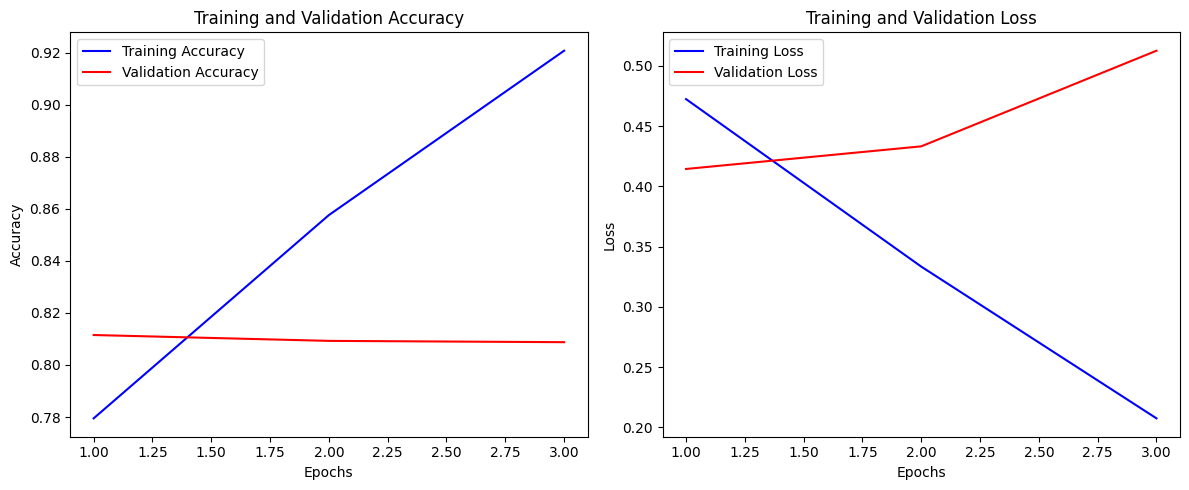

In [ ]:
# Extract training history for plotting
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Set up the figure and subplots
plt.figure(figsize=(12, 5))

# training and validation accuracy plotting
plt.subplot(1, 2, 1)
# Training Accuracy plotting
plt.plot(epochs, history_dict['accuracy'], 'b', label='Training Accuracy')
# Validation Accuracy plotting
plt.plot(epochs, history_dict['val_accuracy'], 'r', label='Validation Accuracy')
# title
plt.title('Training and Validation Accuracy')
# Epochs
plt.xlabel('Epochs')
# Accuracy
plt.ylabel('Accuracy')
plt.legend()

# training and validation loss plotting
plt.subplot(1, 2, 2)
# Training Loss plotting
plt.plot(epochs, history_dict['loss'], 'b', label='Training Loss')
# Validation Loss plotting
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation Loss')
# title
plt.title('Training and Validation Loss')
# Epochs
plt.xlabel('Epochs')
# Loss
plt.ylabel('Loss')
plt.legend()

# tight_layout
plt.tight_layout()

plt.show()


**4.0 Deployment**

After training, the BERT model was saved on Google Drive for deployment. Using the ipywidgets library, an interactive UI was created with a text input and predict button. The text is tokenized with the BERT tokenizer and passed through the model to get predictions. The output logits are converted to probabilities using softmax, and np.argmax determines the class with the highest probability. The result shows the predicted sentiment label and its probability.

**Deployed trained model**

In [ ]:
import ipywidgets as widgets  # Import ipywidgets for interactive widgets
from IPython.display import display, clear_output  # Import display and clear_output for displaying and updating outputs in Jupyter notebooks

In [ ]:
# Define the path to the saved BERT model
model_path = '/content/drive/MyDrive/Projects/Assignments/Bert_model'

# Load the pre-trained BERT model from the specified path
model = TFBertForSequenceClassification.from_pretrained(model_path)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def predict(text):
    # Tokenize the input text for the BERT model
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=512)

    # Get model predictions
    prediction = model(inputs)
    logits = prediction.logits.numpy()

    # Compute probabilities using softmax
    probabilities = tf.nn.softmax(logits, axis=1).numpy()[0]

    # Determine the predicted class and its probability
    predicted_class = np.argmax(probabilities)
    predicted_probability = probabilities[predicted_class]

    # Assign label based on the predicted class
    label = "Positive" if predicted_class == 1 else "Negative"

    return label, predicted_probability

def on_button_click(button):
    """
    Function to be called when the button is clicked.
    """
    clear_output(wait=True)  # Clear the previous output

    text = text_area.value  # Get the text from the input widget

    if text:
        label, probability = predict(text)  # Make prediction
        result_text = f"Prediction: {label} with probability {probability:.4f}"
    else:
        result_text = "No text entered."

    print(result_text)  # Display the result

    display_ui()  # Display the UI components again

def display_ui():
    """
    Function to display the UI components.
    """
    display(text_area, button)  # Display the text input area and button

# Create a text area widget for user input
text_area = widgets.Textarea(
    value='',
    placeholder='Type something',
    description='Input Text:',
    disabled=False,
    layout=widgets.Layout(height='100px', width='80%')
)

# Create a button widget to trigger prediction
button = widgets.Button(description="Predict")
button.on_click(on_button_click)

# Display the UI components
display_ui()


Prediction: Positive with probability 0.6019


Textarea(value='i got the same two hits the phone must have needed to reset or something', description='Input ‚Ä¶

Button(description='Predict', style=ButtonStyle())

**5.0 Conclusion**

The BERT-based sentiment analysis model successfully classifies tweets from the Sentiment140 dataset with a high validation accuracy of 92.07% and a test accuracy of 83.01%. The interactive deployment allows for efficient real-time sentiment analysis, demonstrating the model's practical utility in understanding public opinion on social media. This approach streamlines sentiment evaluation, providing valuable insights with minimal manual effort.

### **3.Fine-tuning masked language models (MLM)**

-  **Model Used for finetuning using MLM: Bert**
-  **Dataset : IMDB**

**1.Introduciton**

We all enjoy watching movies and sharing our opinions, especially through reviews. However, going through countless reviews to understand general sentiment can be a challenging task. The BERT model for Masked Language Modeling (MLM) simplifies this process by predicting missing words in sentences, helping the model understand context better. By fine-tuning BERT on the IMDb movie review dataset, we aim to enhance the model's ability to understand and predict sentiments in reviews, making it easier to gauge public opinion on films.

**Importing Required Libraries**

In [ ]:
from datasets import load_dataset
# importing BertTokenizer and BertForMaskedLM
from transformers import BertTokenizer, BertForMaskedLM
import torch
# importing DataLoader
from torch.utils.data import DataLoader
# importing DataCollatorForLanguageModeling
from transformers import DataCollatorForLanguageModeling
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from tqdm.auto import tqdm
import math


In [ ]:
import torch  # Import PyTorch library

# Check if CUDA (GPU support) is available and print the result
print("CUDA available:", torch.cuda.is_available())

# Print the number of GPUs available
print("Number of GPUs available:", torch.cuda.device_count())


CUDA available: True
Number of GPUs available: 1


In [ ]:
# Get the name of the GPU device, if available
device_name = tf.test.gpu_device_name()

# Check if the device name contains "GPU" and print a message if not found
if "GPU" not in device_name:
    print("GPU device not found")

# Print the name of the found GPU device
print('Found GPU at: {}'.format(device_name))

# Check if any GPU devices are available and print a corresponding message
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")


Found GPU at: /device:GPU:0
GPU available (YESS!!!!)


**2. Methodology**

For fine-tuning the BERT model on the IMDb dataset, I utilized the Masked Language Modeling (MLM) approach. The IMDb dataset, containing movie reviews, was loaded and tokenized using the Hugging Face datasets library. A pre-trained BERT model was then initialized along with the bert-base-uncased tokenizer to predict masked words in the text. The dataset was processed to group text into chunks suitable for MLM, and random masking was applied. The training involved adjusting the model weights through multiple epochs, using the AdamW optimizer and learning rate scheduler, with performance monitored via perplexity scores.

**Loading the IMDb Dataset**

In [ ]:
dataset = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
print(f"Dataset structure: {dataset}")

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


**Tokenizing the Dataset**

In [ ]:
# BERT tokenizer Loading
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# tokenizing a batch of text function
def tokenize_batch(batch):
    return tokenizer(batch['text'], truncation=True, padding='max_length', max_length=128)

# Apply the tokenization function to the dataset and remove the original "text" and "label" columns
tokenized_dataset = dataset.map(tokenize_batch, batched=True, remove_columns=["text", "label"])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

**Loading the Pretrained BERT Model for Masked Language Modeling**

In [ ]:
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


**Displaying Sample Data from the Dataset**

In [ ]:
from tabulate import tabulate

samples = dataset['train'].shuffle(seed=42).select(range(3))
table = []
for i, row in enumerate(samples):
    table.append([row['label'], row['text'] ])

print(tabulate(table, headers=["Label", "Text" ], tablefmt="grid"))


+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Performing Masked Token Prediction**

In [ ]:
# Define a sample text with a masked token
sample_text = 'This is a great [MASK].'

# Tokenize the sample text and return the tensors for PyTorch
inputs = tokenizer(sample_text, return_tensors='pt')

# Get the logits (raw predictions) from the model
token_logits = model(**inputs).logits

# Find the index of the [MASK] token in the input
mask_token_index = torch.where(inputs['input_ids'] == tokenizer.mask_token_id)[1]

# Extract the logits corresponding to the [MASK] token
mask_token_logits = token_logits[0, mask_token_index, :]

# Get the top 5 token predictions for the [MASK] token
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

# Print the predictions by replacing the [MASK] token with each of the top 5 predicted tokens
for token in top_5_tokens:
    print(f"Prediction: {sample_text.replace(tokenizer.mask_token, tokenizer.decode([token]))}")


Prediction: This is a great idea.
Prediction: This is a great day.
Prediction: This is a great place.
Prediction: This is a great time.
Prediction: This is a great thing.


**Grouping Texts for Masked Language Modeling (MLM)**

In [ ]:
def group_texts_for_mlm(batch):
    # Define the chunk size for splitting the text
    chunk_size = 128

    # Concatenate all input ids and other elements in the batch into a single list
    concatenated = {k: sum(batch[k], []) for k in batch.keys()}

    # Calculate the total length of the input ids and adjust it to be a multiple of chunk_size
    total_length = len(concatenated["input_ids"])
    total_length = (total_length // chunk_size) * chunk_size

    # Split the concatenated input ids into chunks of chunk_size
    result = {k: [t[i:i + chunk_size] for i in range(0, total_length, chunk_size)] for k, t in concatenated.items()}

    # Copy the input ids to create labels (for MLM, labels are the input ids themselves)
    result["labels"] = result["input_ids"].copy()

    return result

# Apply the grouping function to the tokenized dataset to prepare it for MLM
lm_dataset = tokenized_dataset.map(group_texts_for_mlm, batched=True)



Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

**Splitting the Dataset**

In [ ]:
train_samples = 10000
test_samples = int(0.1 * train_samples)
split_dataset = lm_dataset["train"].train_test_split(train_size=train_samples, test_size=test_samples, seed=42)

**Preparing Data Collator and DataLoaders**

In [ ]:
# Initialize the data collator for language modeling with a masking probability of 15%
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)

# Function to apply random masking to a batch of data using the data collator
def apply_random_mask(batch):
    return data_collator([batch])

# Define batch size
batch_size = 32

# Create DataLoaders for training and evaluation datasets
# The training DataLoader shuffles the data and applies the data collator for MLM
train_loader = DataLoader(split_dataset["train"], batch_size=batch_size, shuffle=True, collate_fn=data_collator)

# The evaluation DataLoader applies the data collator but does not shuffle the data
eval_loader = DataLoader(split_dataset["test"], batch_size=batch_size, collate_fn=data_collator)


**Model Setup and Training Configuration**

In [ ]:
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

optimizer = AdamW(model.parameters(), lr=5e-5)

accelerator = Accelerator()

model, optimizer, train_loader, eval_loader = accelerator.prepare(model, optimizer, train_loader, eval_loader)

epochs = 30
steps_per_epoch = len(train_loader)
total_training_steps = steps_per_epoch * epochs
lr_scheduler = get_scheduler("linear", optimizer, num_warmup_steps=0, num_training_steps=total_training_steps)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


**3.Training and Fine-Tuning**

In this Masked Language Modeling (MLM) task, the BERT model was fine-tuned using the IMDb dataset. The dataset was processed to create a training set of 10,000 samples and a test set with 1,000 samples. The model was trained for 30 epochs using the AdamW optimizer and a learning rate scheduler to adjust the learning rate during training. The training process showed a gradual reduction in perplexity, starting at 7.26 in the first epoch and decreasing to 6.23 by the 18th epoch, indicating improved model performance. The final trained model demonstrated a strong ability to predict masked tokens, with accurate predictions and high confidence scores during inference.

**Training and Evaluation**

In [ ]:
progress_bar = tqdm(range(total_training_steps))

for epoch in range(epochs):
    # Training phase
    model.train()
    for batch in train_loader:
        outputs = model(**batch)
        loss = outputs.loss
        accelerator.backward(loss)
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

    model.eval()
    eval_losses = []
    for batch in eval_loader:
        with torch.no_grad():
            outputs = model(**batch)
        eval_losses.append(outputs.loss)

    eval_loss = torch.mean(torch.tensor(eval_losses))
    perplexity = torch.exp(eval_loss)
    print(f"Epoch {epoch + 1}: Perplexity: {perplexity:.2f}")

output_dir = "bert_mlm_trained"
accelerator.wait_for_everyone()
unwrapped_model = accelerator.unwrap_model(model)
unwrapped_model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


  0%|          | 0/9390 [00:00<?, ?it/s]

Epoch 1: Perplexity: 7.26
Epoch 2: Perplexity: 7.38
Epoch 3: Perplexity: 7.08
Epoch 4: Perplexity: 6.89
Epoch 5: Perplexity: 7.03
Epoch 6: Perplexity: 6.89
Epoch 7: Perplexity: 6.54
Epoch 8: Perplexity: 6.81
Epoch 9: Perplexity: 6.58
Epoch 10: Perplexity: 6.64
Epoch 11: Perplexity: 6.91
Epoch 12: Perplexity: 6.68
Epoch 13: Perplexity: 6.81
Epoch 14: Perplexity: 6.26
Epoch 15: Perplexity: 6.31
Epoch 16: Perplexity: 6.64
Epoch 17: Perplexity: 6.66
Epoch 18: Perplexity: 6.23
Epoch 19: Perplexity: 6.59
Epoch 20: Perplexity: 6.68
Epoch 21: Perplexity: 6.30
Epoch 22: Perplexity: 6.51
Epoch 23: Perplexity: 6.54
Epoch 24: Perplexity: 6.62
Epoch 25: Perplexity: 6.60
Epoch 26: Perplexity: 6.36
Epoch 27: Perplexity: 6.70
Epoch 28: Perplexity: 6.37
Epoch 29: Perplexity: 6.33
Epoch 30: Perplexity: 6.59


('bert_mlm_trained/tokenizer_config.json',
 'bert_mlm_trained/special_tokens_map.json',
 'bert_mlm_trained/vocab.txt',
 'bert_mlm_trained/added_tokens.json')

**4 Deployment**

The trained BERT model was deployed using the Hugging Face pipeline API for masked language modeling. A sample text, "This is a great [MASK]," was provided, and the model predicted "movie" with a confidence score of 0.59, followed by "film" at 0.34. Additional predictions included "documentary," "show," and "story," each with confidence scores of 0.01. This deployment demonstrates the model's ability to predict contextually relevant words with varying confidence levels.

**Inference with Trained Model**

In [ ]:
from transformers import pipeline

# Load the trained model and create a fill-mask pipeline
mlm_pipeline = pipeline("fill-mask", model=output_dir)

# Define a sample text with a mask token
text = "This is a great [MASK]."

# Get predictions for the masked token
predictions = mlm_pipeline(text)

# Print each prediction along with its confidence score
for prediction in predictions:
    print(f"Predicted: {prediction['sequence']} | Confidence: {prediction['score']:.2f}")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Predicted: this is a great movie. | Confidence: 0.59
Predicted: this is a great film. | Confidence: 0.34
Predicted: this is a great documentary. | Confidence: 0.01
Predicted: this is a great show. | Confidence: 0.01
Predicted: this is a great story. | Confidence: 0.01


**5. Conclusion**

The fine-tuning of the BERT model for masked language modeling on the IMDb dataset achieved a final perplexity of 6.59 after 30 epochs, indicating a stable learning process. The model demonstrated effective masked token prediction capabilities, with the highest confidence prediction being "movie" at 0.59. This performance highlights the model's robust ability to understand and predict contextual text, making it suitable for various NLP applications involving masked text.

### **4.Train or fine-tune a medium-sized language model using BERT / ROBERTa, or T5**

- **Model Used : ROBERTa**
- **Dataset Used : ag_news**
- **Type : News category classification**

**Introduction**

In today's world, the sheer volume of news articles spanning categories such as World, Sports, Business, and Science/Tech can be overwhelming. Manually categorizing these articles into their respective categories is impractical and time-consuming. Advanced machine learning models, like RoBERTa, offer an efficient solution to this problem. By training and fine-tuning a RoBERTa model on the AG News dataset, which includes articles in these four categories, we aim to automate the classification process. This approach streamlines news categorization, making it more efficient and accurate.

**Importing Required Libraries**

In [ ]:
import logging
# importing RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
# importing  load_dataset, load_metric
from datasets import load_dataset, load_metric
# importing  numpy
import numpy as np
# importing  pandas
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


**2.Methodology**

A RoBERTa model was used for classifying news articles from the AG News dataset into four categories: World, Sports, Business, and Science/Tech. The dataset was loaded, cleaned, and tokenized, followed by exploratory data analysis (EDA) to examine class distribution, text length, and top words. The data was split into training, validation, and test sets, and the model was trained using the Trainer class with specified hyperparameters. Performance was evaluated on the test set, and results, including loss and accuracy, were visualized. Finally, the model and tokenizer were saved for future use.

**Load the AG News Dataset**

In [ ]:
def load_and_explore_data():
    logger.info("Loading AG News dataset")
    dataset = load_dataset("ag_news")

    logger.info("Dataset info: ")
    print("Dataset info: ")
    logger.info(dataset)
    print(dataset)

    logger.info("Sample data from the training set:")
    print("Sample data from the training set:")
    logger.info(dataset['train'][0])
    print(dataset['train'][0])

    return dataset

dataset = load_and_explore_data()


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset info: 
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})
Sample data from the training set:
{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'label': 2}


**Preprocessing**

In [ ]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (e.g., @user)
    text = re.sub(r'@\w+', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Replace multiple spaces with a single space and trim leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

**Prepare Data for Training**

In [ ]:
def preprocess_and_split_data(dataset, tokenizer, max_length=256):
    def preprocess_function(examples):
        # Clean text and tokenize it
        texts = [clean_text(text) for text in examples['text']]
        return tokenizer(texts, truncation=True, padding='max_length', max_length=max_length)

    logger.info("Tokenizing datasets")

    # Split the dataset into training, validation, and test sets
    train_val_test_split = dataset['train'].train_test_split(test_size=0.6)
    train_val_split = train_val_test_split['train'].train_test_split(test_size=1/3)

    train_split = train_val_split['train']
    val_split = train_val_split['test']

    # Apply preprocessing and tokenization
    train_dataset = train_split.map(preprocess_function, batched=True)
    val_dataset = val_split.map(preprocess_function, batched=True)
    test_dataset = dataset['test'].map(preprocess_function, batched=True)

    # Rename columns for consistency
    train_dataset = train_dataset.rename_column("label", "labels")
    val_dataset = val_dataset.rename_column("label", "labels")
    test_dataset = test_dataset.rename_column("label", "labels")

    return train_dataset, val_dataset, test_dataset

# Initialize tokenizer and preprocess the dataset
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_dataset, val_dataset, test_dataset = preprocess_and_split_data(dataset, tokenizer)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/32000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
train_dataset

Dataset({
    features: ['text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 32000
})

In [ ]:
val_dataset

Dataset({
    features: ['text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [ ]:
test_dataset

Dataset({
    features: ['text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 7600
})

**Inspecting Data Samples**

In [ ]:
for i in range(3):
    print(f"Sample {i+1}:")
    print("Text:", train_dataset[i]['text'])
    print("Label:", train_dataset[i]['labels'])
    print()


Sample 1:
Text: Microsoft expands software indemnification program Microsoft is expanding its indemnification program for Windows and other software products in order to shield users from legal claims and patent disputes.
Label: 3

Sample 2:
Text: Time for 2-year-olds to be in the spotlight This is the last big weekend for prep races before the Breeders' Cup at Lone Star Park Oct. 30, and the 2-year-olds will take center stage.
Label: 1

Sample 3:
Text: Gunmen seize Russian school, taking 400 hostages A television grab shows a soldier helping a girl away from the scene at a school in the town of Beslan in the province of North Ossetia near Chechnya, September 1, 2004.
Label: 0



**Class Distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


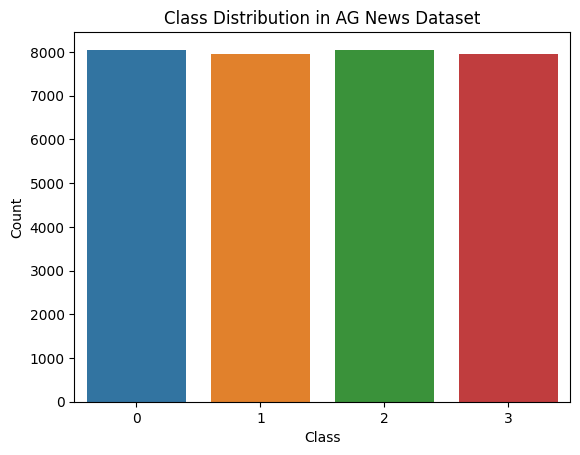

In [ ]:
def plot_class_distribution(dataset):
    logger.info("Plotting class distribution")
    labels = [example['labels'] for example in train_dataset]
    sns.countplot(x=labels)
    logger.info("Class Distribution in AG News Dataset")
    plt.title("Class Distribution in AG News Dataset")
    # Class as xlabel
    plt.xlabel("Class")
    #  Count as ylabel
    plt.ylabel("Count")
    plt.show()

plot_class_distribution(dataset)


**Text Length Analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


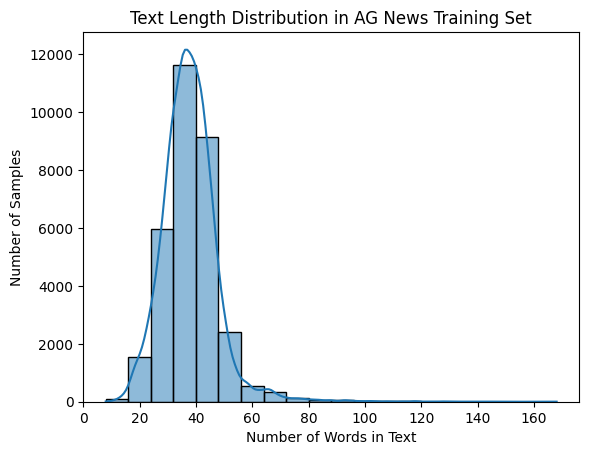

Average text length: 37.8600625 words
Maximum text length: 168 words
Minimum text length: 8 words


In [ ]:
text_lengths = [len(sample['text'].split()) for sample in train_dataset]

sns.histplot(text_lengths, bins=20,kde=True)
plt.xlabel('Number of Words in Text')
plt.ylabel('Number of Samples')
plt.title('Text Length Distribution in AG News Training Set')
plt.show()

print(f"Average text length: {np.mean(text_lengths)} words")
print(f"Maximum text length: {np.max(text_lengths)} words")
print(f"Minimum text length: {np.min(text_lengths)} words")


**Label Mapping**

In [ ]:
label_mapping = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Science/Tech"
}

print("Label Mapping:")
for label, category in label_mapping.items():
    print(f"Label {label}: {category}")


Label Mapping:
Label 0: World
Label 1: Sports
Label 2: Business
Label 3: Science/Tech


**Word Cloud for Each Class**

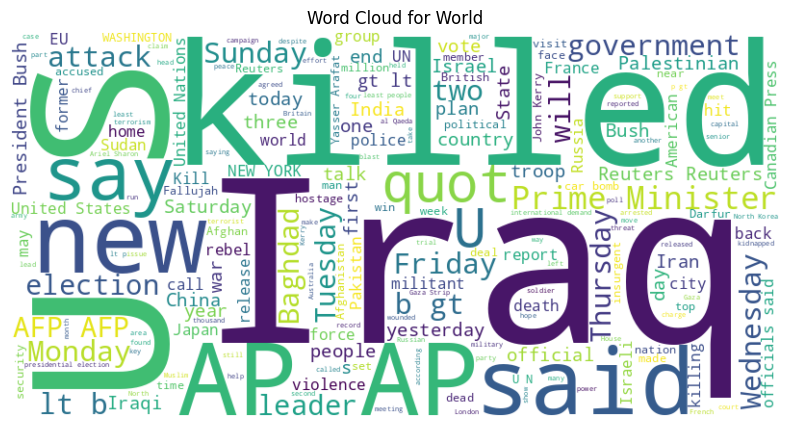

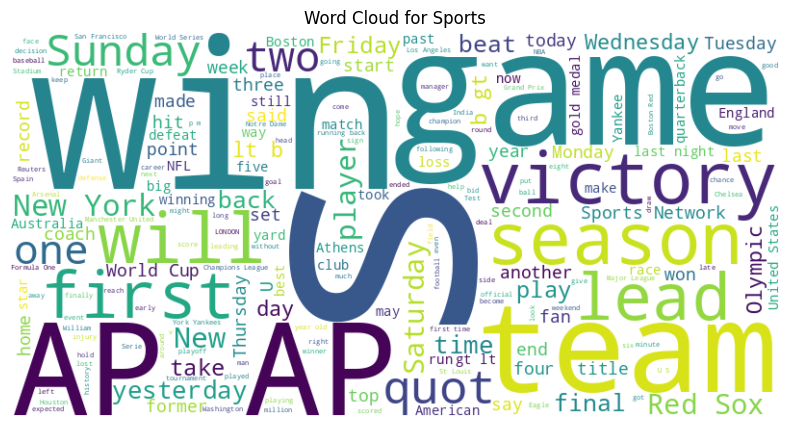

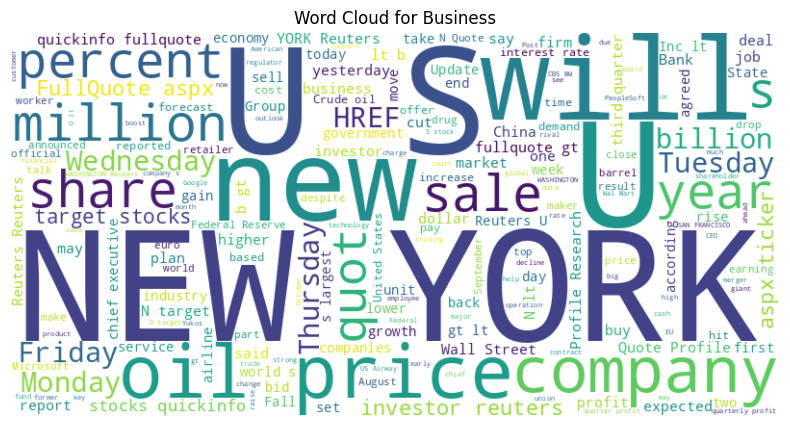

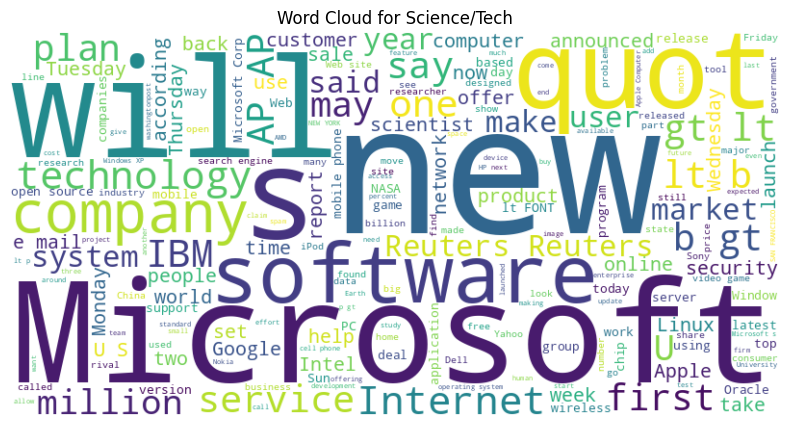

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    # word could plot
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    # interpolation setting
    plt.imshow(wordcloud, interpolation='bilinear')
    # title setting
    plt.title(title)
    plt.axis('off')
    plt.show()

for label, category in label_mapping.items():
    class_texts = " ".join([sample['text'] for sample in train_dataset if sample['labels'] == label])
    plot_wordcloud(class_texts, f"Word Cloud for {category}")


**Top Words by Class**

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


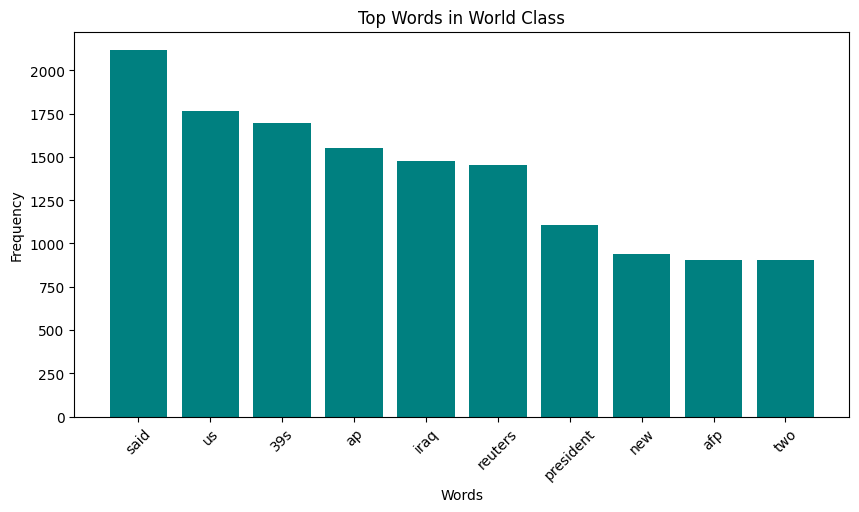

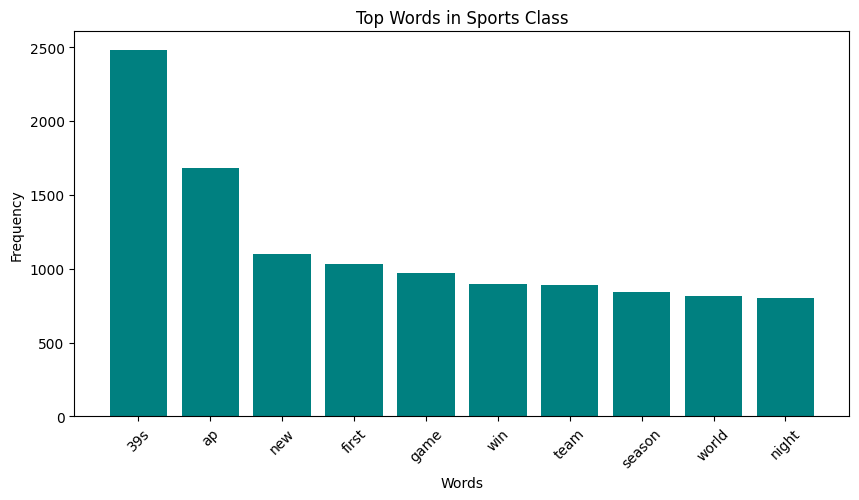

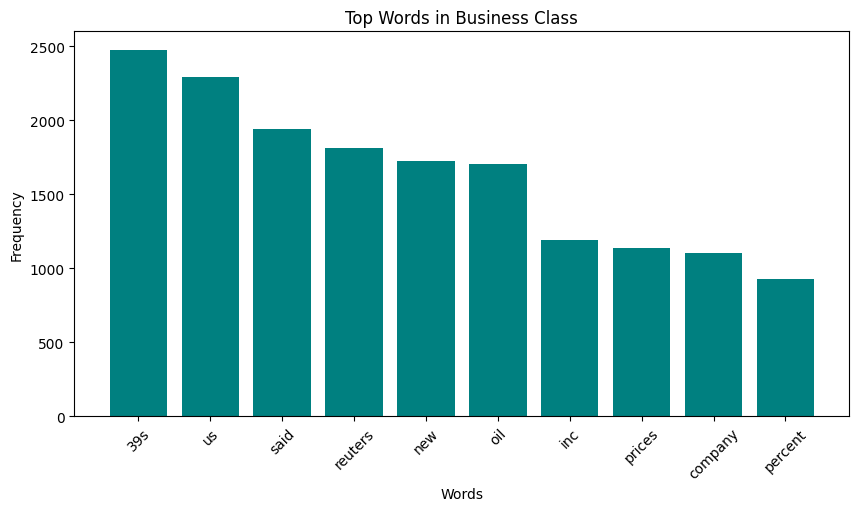

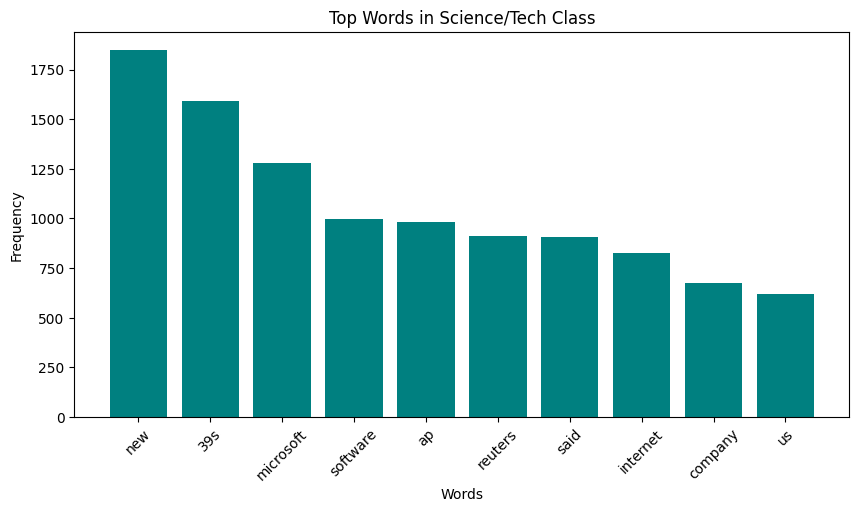

In [ ]:
import matplotlib.pyplot as plt
# importing datasets
from datasets import load_dataset
from collections import Counter
# impoerint nltk tools
import nltk
# importing necessary text processing functions
from nltk.corpus import stopwords
import re

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans the input text by removing punctuation and converting to lowercase.

    Args:
    text (str): The text to be cleaned.

    Returns:
    str: The cleaned text.
    """
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

def get_top_words(dataset, label, n=10):
    """
    Extracts the top 'n' most frequent words for a specific label from the dataset.

    Args:
    dataset (Dataset): The dataset to process.
    label (int): The label for which to extract top words.
    n (int): The number of top words to return.

    Returns:
    list: A list of tuples containing the most common words and their counts.
    """
    words = []
    for sample in dataset:
        if sample['labels'] == label:
            cleaned_text = clean_text(sample['text'])
            words.extend([word for word in cleaned_text.split() if word not in stop_words])
    return Counter(words).most_common(n)

# Iterate over the label mapping to visualize top words
for label, category in label_mapping.items():
    top_words = get_top_words(train_dataset, label)

    if top_words:
        words, counts = zip(*top_words)
    else:
        words, counts = [], []

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='teal')
    # words as xlabel
    plt.xlabel('Words')
    # Frequency as ylabel
    plt.ylabel('Frequency')
    # title
    plt.title(f"Top Words in {category} Class")
    plt.xticks(rotation=45)
    plt.show()


**Token Length Distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


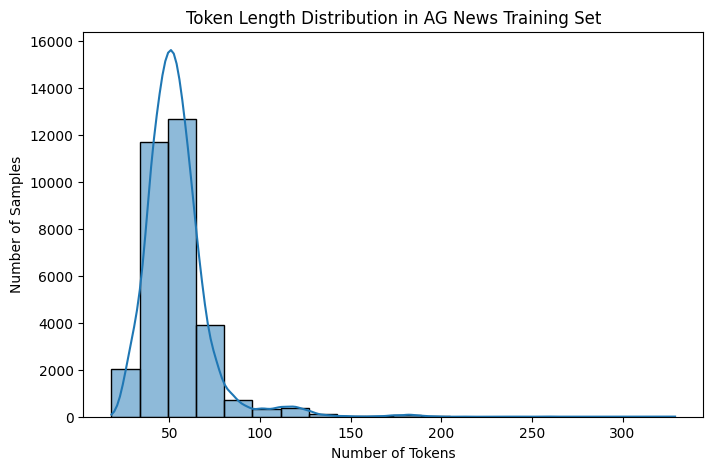

Average token length: 54.11 tokens
Maximum token length: 329 tokens
Minimum token length: 18 tokens


In [ ]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

token_lengths = [len(tokenizer(sample['text'])['input_ids']) for sample in train_dataset]

plt.figure(figsize=(8, 5))
sns.histplot(token_lengths, bins=20,kde=True)

plt.xlabel('Number of Tokens')
plt.ylabel('Number of Samples')
plt.title('Token Length Distribution in AG News Training Set')
plt.show()

print(f"Average token length: {np.mean(token_lengths):.2f} tokens")
print(f"Maximum token length: {np.max(token_lengths)} tokens")
print(f"Minimum token length: {np.min(token_lengths)} tokens")


**Disabling Weights & Biases Logging**

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

**3. Training and Fine Tuning**

The RoBERTa-based model was fine-tuned on the AG News dataset over 3 epochs with a steady increase in validation accuracy, reaching 92.99% by the final epoch. The test evaluation yielded a loss of 0.244 and accuracy of 92.89%, demonstrating the model's strong performance in categorizing news articles into predefined classes.

**Training the Model**

In [ ]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import load_metric
import numpy as np

def train_model(train_dataset, val_dataset, model_name='roberta-base', num_labels=4):
    model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

    training_args = TrainingArguments(
        output_dir='./results',
        eval_strategy='epoch',
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        save_total_limit=2,
        metric_for_best_model="accuracy",
        greater_is_better=True
    )

    def compute_metrics(p):
        metric = load_metric("accuracy")
        predictions, labels = p
        predictions = np.argmax(predictions, axis=1)
        return metric.compute(predictions=predictions, references=labels)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    print("Starting training")
    trainer.train()

    print("Evaluating the model")
    results = trainer.evaluate()
    print(f"Evaluation results: {results}")

    return trainer

trainer = train_model(train_dataset, val_dataset)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Starting training


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/tmp/ipykernel_34/1702828889.py:27: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

Evaluating the model


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation results: {'eval_loss': 0.23504093289375305, 'eval_accuracy': 0.929875, 'eval_runtime': 138.6913, 'eval_samples_per_second': 115.364, 'eval_steps_per_second': 3.605, 'epoch': 3.0}


**Evaluate the Model**

In [ ]:
print("Evaluating the model on the test dataset")
test_results = trainer.evaluate(test_dataset)

print(f"Test loss: {test_results['eval_loss']}")
print(f"Test accuracy: {test_results['eval_accuracy']}")

Evaluating the model on the test dataset


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Test loss: 0.24438701570034027
Test accuracy: 0.9289473684210526


**Plot Training and Validation Metrics**

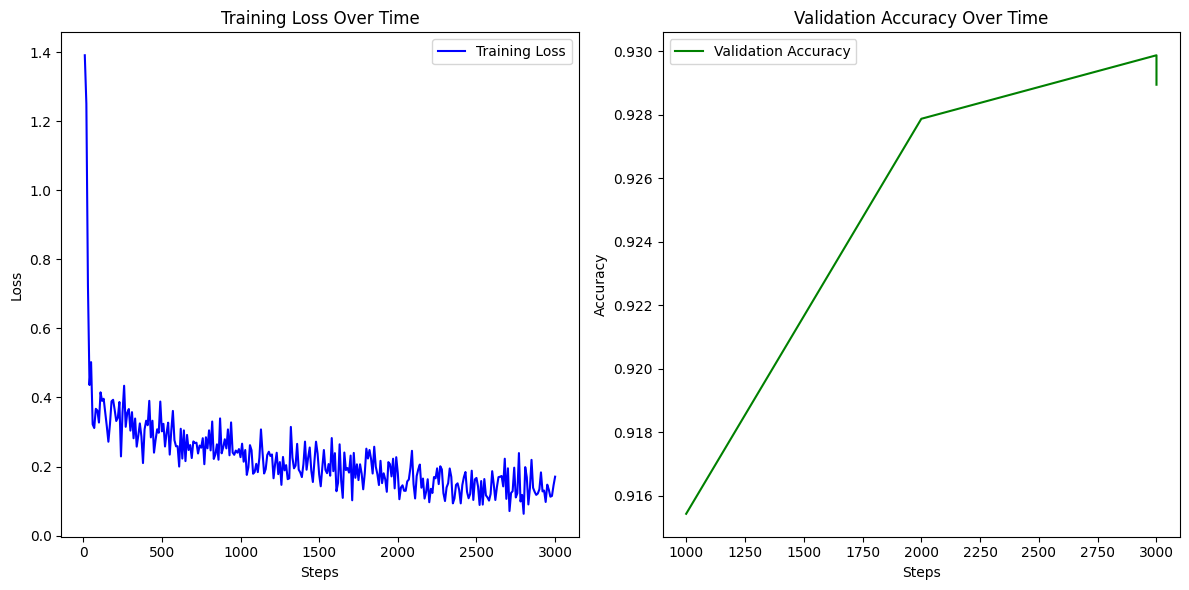

In [ ]:
import matplotlib.pyplot as plt

def plot_training_metrics(trainer):
    metrics = trainer.state.log_history

    steps = [metric['step'] for metric in metrics if 'loss' in metric]
    losses = [metric['loss'] for metric in metrics if 'loss' in metric]

    eval_steps = [metric['step'] for metric in metrics if 'eval_accuracy' in metric]
    accuracies = [metric['eval_accuracy'] for metric in metrics if 'eval_accuracy' in metric]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(steps, losses, label='Training Loss', color='blue')
    plt.title("Training Loss Over Time")
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(eval_steps, accuracies, label='Validation Accuracy', color='green')
    plt.title("Validation Accuracy Over Time")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_metrics(trainer)


**Saving the model and tokenizer**

In [ ]:
def save_model_and_tokenizer(trainer, path='./results/final_model'):
    logger.info("Saving the model and tokenizer")
    trainer.save_model(path)
    tokenizer.save_pretrained(path)

save_model_and_tokenizer(trainer)

**4. Conclusion**

The RoBERTa-based model was successfully trained and fine-tuned on the AG News dataset, achieving high performance across all stages. The model demonstrated significant improvements in accuracy and loss metrics throughout the training process, with a final test accuracy of 92.89%. This result highlights the model's effectiveness in classifying news articles into categories such as World, Sports, Business, and Science/Tech. The comprehensive analysis and visualizations further validated the robustness and accuracy of the classification model.